# Quick Interferometry Analysis

This code uses just the measured fringe shift and the size of the plasma to infer the electron density for an underdense plasma at a range of pressures. It assumes a uniform plasma density, so if there is, for instance, a Gaussian profile, it will underestimate the peak density.

In [35]:
from Interferometry import phaseToDensity
import scipy.constants as constant
import numpy as np
import matplotlib.pyplot as plt

In [5]:
lambda0 = 0.8e-6;

#Calibration
m_per_pixel = 5.27e-6

In [41]:
P = np.array([0,100,200,300,400,500,600])
shifts = np.array([0,0.5,1,1.5,2.5,2.5,3])*2*constant.pi
shift_err = 0.5*constant.pi
Ls = np.array([1e10, 58,66,78,88,98,94]) * m_per_pixel

This data is from run 24 of 5/9/19 - a scan from 100 mbar to 600 mbar of air.

In [59]:
nes = phaseToDensity(shifts,Ls,lambda0)/1e6
ne_errs = phaseToDensity(shift_err,Ls,lambda0)/1e6

print('ne:',nes)
print('ne errors:',ne_errs)

ne: [0.00000000e+00 4.55920883e+18 8.01315492e+18 1.01705428e+19
 1.50246655e+19 1.34915363e+19 1.68787731e+19]
ne errors: [1.32217056e+10 2.27960442e+18 2.00328873e+18 1.69509046e+18
 1.50246655e+18 1.34915363e+18 1.40656443e+18]


In [65]:
poly = np.polyfit(P,nes,1,w=(ne_errs)**-2)
ne_pred = np.polyval(poly,P)
                     
print('Coefficient:', 1000*poly[0],'cm^-3 / bar')

Coefficient: 2.958232729987494e+19 cm^-3 / bar


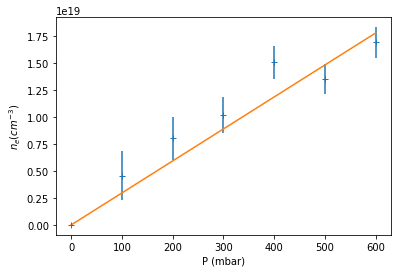

In [66]:
plt.errorbar(P,nes,ne_errs,marker='+',linestyle='')
plt.xlabel('P (mbar)');
plt.ylabel('$n_e  (cm^{-3})$');

plt.plot(P,ne_pred);

This now estimates the expected ionization rate:

In [74]:
T = 293

coeff = 1e5 / (constant.Boltzmann*T) / 1e6
Z = 1000*poly[0]/coeff

print('Predicted no. molecules:',coeff,'cm^-3 / bar')
print('Inferred ionization state:',Z,'electrons per molecule')

Predicted no. molecules: 2.472004448515579e+19 cm^-3 / bar
Inferred ionization state: 1.1966939346585284 electrons per molecule
